# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import nltk

from dateutil.parser import parse
from geopy.geocoders import Nominatim
from yellowbrick import ClassBalance
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize, TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

# Configurações
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)

plt.rcParams["figure.figsize"] = (12,6)
plt.style.use("seaborn-darkgrid")

In [2]:
# Lendo base de dados
Base_Dados =  pd.read_csv("data\Tweets_Mg.csv", index_col=[0])

# Dimensão
Base_Dados.shape

(8199, 25)

In [3]:
# Duplicados
Base_Dados.drop_duplicates(['Text'], inplace=True)

# Verificar
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Modelagem & EDA (Exploração)

## Ajustando Data

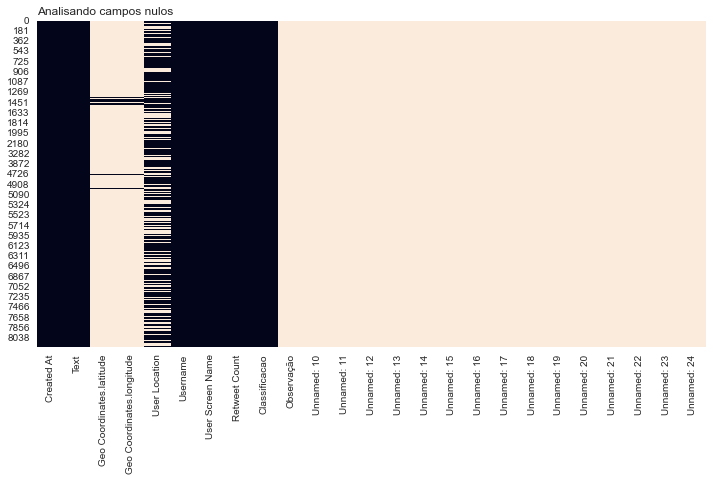

In [4]:
# Campos nulos
Nulos = Base_Dados.isnull()

plt.title("Analisando campos nulos", loc="left")
sns.heatmap(Nulos, cbar=False);

In [5]:
# Colunas
Base_Dados.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [6]:
# Removendo colunas desnecessárias
Colunas_Extrair = Base_Dados.columns[10:]
Base_Dados.drop(columns=Colunas_Extrair, inplace=True)

# Dimensão
Base_Dados.shape

(5765, 10)

In [7]:
# Únicos
Base_Dados.nunique()

Created At                   5603
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1008
Username                     2311
User Screen Name             2320
Retweet Count                 113
Classificacao                   3
Observação                      1
dtype: int64

In [8]:
# Infos
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765 entries, 0 to 8198
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 5765 non-null   object 
 1   Text                       5765 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              3851 non-null   object 
 5   Username                   5765 non-null   object 
 6   User Screen Name           5765 non-null   object 
 7   Retweet Count              5765 non-null   int64  
 8   Classificacao              5765 non-null   object 
 9   Observação                 1 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 495.4+ KB


## Ajustando Data

In [9]:
# Função
Experimento_Data = Base_Dados["Created At"][0]

print(f"Antes: {Experimento_Data}")
print(f"Depois: {parse(Experimento_Data).date()}")

Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [10]:
def ajustar(Data):
    '''
    Função para converter datas
    '''
    # Atribuir
    Texto_Data = Data
    
    # Tranform
    Tranformacao = parse(Texto_Data)
    
    # Extração
    Data_Formatada = Tranformacao.date()

    return Data_Formatada


# Atribuição função
Base_Dados["Data_Formatada"] = Base_Dados["Created At"].apply(ajustar)

Base_Dados.iloc[0:5,5:]

,Username,User Screen Name,Retweet Count,Classificacao,Observação,Data_Formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,2017-01-08
1,Wândell,klefnews,0,Neutro,NaN,2017-01-08
2,Wândell,klefnews,0,Neutro,NaN,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,NaN,2017-01-04
4,Emily,Milly777,0,Negativo,NaN,2017-01-09


In [11]:
# Gerando meses, anos e dias

# Tranforma data
Base_Dados["Data_Formatada"] = pd.to_datetime(Base_Dados["Data_Formatada"])

# Extraindo
Base_Dados["Ano"] = Base_Dados["Data_Formatada"].dt.year
Base_Dados["Mes"] = Base_Dados["Data_Formatada"].dt.month
Base_Dados["Dia"] = Base_Dados["Data_Formatada"].dt.day

Base_Dados.iloc[0:5,5:]

,Username,User Screen Name,Retweet Count,Classificacao,Observação,Data_Formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,NaN,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,NaN,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,NaN,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,NaN,2017-01-09,2017,1,9


In [12]:
# Analisando

Base_Dados.groupby(by=["Ano", "Mes"]).agg(
    Quantidade = ("Username", "count")
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          4725
     2          1037

## Ajustando Geo-Localização

In [13]:
Base_Dados.isnull().sum()

Created At                      0
Text                            0
Geo Coordinates.latitude     5661
Geo Coordinates.longitude    5661
User Location                1914
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Observação                   5764
Data_Formatada                  0
Ano                             0
Mes                             0
Dia                             0
dtype: int64

In [14]:
# Filtrando os nulos
Analise_Geo = Base_Dados.loc[
    (Base_Dados['Geo Coordinates.latitude'].notnull()) &
    (Base_Dados['Geo Coordinates.longitude'].notnull())
]

# Shape
Analise_Geo.shape

(104, 14)

In [15]:
# Verificando

Analise_Geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Data_Formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,NaN,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,NaN,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,NaN,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,NaN,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,NaN,2017-01-10,2017,1,10


In [16]:
# Agrupar as Geo
Analise_Localizacao = Analise_Geo.groupby(by=['Geo Coordinates.latitude', 'Geo Coordinates.longitude']).count()[['Username']].reset_index()

# Renomeando
Analise_Localizacao.columns = ['Lat','Lon','Quantidade']

Analise_Localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [17]:
# Verificando
Base_Dados['User Location'].head(20)

0                             Brasil
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5         Um Outro Mundo É Possível 
6                                NaN
7             Belo Horizonte, Brasil
8                                NaN
9                Belo Horizonte - MG
10      error 404 location not found
11              Minas Gerais, Brasil
12    Santo Antônio do Monte, Brasil
13                            BRASIL
14                               NaN
15            San Pedro Garza García
16                               NaN
17            Belo Horizonte, Brasil
18          Belo Horizonte MG Brasil
19          Belo Horizonte/MG/Brasil
Name: User Location, dtype: object

In [18]:
# Instanciando a Funcao
Instanciando_Funcao = Nominatim(user_agent='GetLoc')

print(f'Local: {Instanciando_Funcao.geocode("Dionísio").address}')
print(f'Latitude: {Instanciando_Funcao.geocode("Dionísio").latitude}')
print(f'Longitude: {Instanciando_Funcao.geocode("Dionísio").longitude}')

Local: Dionísio, Região Geográfica Imediata de Ipatinga, Região Geográfica Intermediária de Ipatinga, Minas Gerais, Região Sudeste, Brasil
Latitude: -19.841944
Longitude: -42.776945


In [19]:
# Analise de representatividade
Analise_Local = Base_Dados['User Location'].value_counts(normalize=True).cumsum().reset_index()

# Filtrando apenas até 50%
Analise_Local = Analise_Local.loc[Analise_Local['User Location'] < 0.5]

# Renomeando colunas
Analise_Local.columns = ['Local','%']

# Verificando
Analise_Local.head()

,Local,%
0,Brasil,0.111140
1,Minas Gerais,0.200208
2,Belo Horizonte - Minas Gerais,0.260452
3,"Belo Horizonte, Brasil",0.310049
4,Belo Horizonte,0.333420


In [20]:
# Dimensão
Analise_Local.shape

(20, 2)

In [21]:
# Calcular a quantidade
Quantidade = Base_Dados['User Location'].value_counts().reset_index()

# Renomeando
Quantidade.columns = ['Local','Quantidade']

Quantidade.head()

,Local,Quantidade
0,Brasil,428
1,Minas Gerais,343
2,Belo Horizonte - Minas Gerais,232
3,"Belo Horizonte, Brasil",191
4,Belo Horizonte,90


In [22]:
# Cruzando os dados
Tab_Localizacao = pd.merge(Analise_Local, Quantidade, on=['Local'], how='inner')

# Verificando
Tab_Localizacao.head()

,Local,%,Quantidade
0,Brasil,0.111140,428
1,Minas Gerais,0.200208,343
2,Belo Horizonte - Minas Gerais,0.260452,232
3,"Belo Horizonte, Brasil",0.310049,191
4,Belo Horizonte,0.333420,90


In [23]:
# Valores Unicos
Tab_Localizacao['Local'].unique()

array(['Brasil', 'Minas Gerais', 'Belo Horizonte - Minas Gerais',
       'Belo Horizonte, Brasil', 'Belo Horizonte', 'Brazil',
       'Belo Horizonte MG Brasil', 'Guarulhos - SP',
       'São Joquim de Bicas', 'Minas Gerais, Brasil',
       'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'Brasília, Brasil',
       'São Paulo', 'Brasil Natal/RN', '-16.683649,-49.268102',
       'Babilonia', 'Rio de Janeiro', 'Fortaleza - Ceará - Brazil',
       'WorldWide'], dtype=object)

In [24]:
# Incluindo a Geo Localização com GEOPY
Tab_Localizacao['Latitude'] = None
Tab_Localizacao['Longitude'] = None

# Loop
for Loop in range(0, len(Tab_Localizacao['Local'])):

    try:
        Local = Instanciando_Funcao.geocode(Tab_Localizacao['Local'][Loop])
    except:
        pass
    
    if Local != None:
        Tab_Localizacao['Latitude'][Loop] = Local.latitude
        Tab_Localizacao['Longitude'][Loop] = Local.longitude

In [25]:
Tab_Localizacao.head()

,Local,%,Quantidade,Latitude,Longitude
0,Brasil,0.111140,428,-10.333333,-53.2
1,Minas Gerais,0.200208,343,-18.526484,-44.158865
2,Belo Horizonte - Minas Gerais,0.260452,232,-19.922578,-43.945136
3,"Belo Horizonte, Brasil",0.310049,191,-19.922578,-43.945136
4,Belo Horizonte,0.333420,90,-19.922578,-43.945136


In [26]:
# Plot dos dados
px.density_mapbox(
    # Dados
    Tab_Localizacao,
    # Latitude
    lat = 'Latitude',
    # Longitude
    lon = 'Longitude',
    # Quantidade
    z = 'Quantidade',
    # Estilo do mapa
    mapbox_style = 'stamen-terrain',
    # Centralização
    center = dict(lat=-23.700, lon=-46.555),
    # Zoom
    zoom = 3,
    # Circulo
    radius = 30
)

## Analise de outras variaveis

In [27]:
# Usuarios
Base_Dados['Username'].value_counts()

POLÍCIA MILITAR MG      297
Hugo TIMBETA            100
Camila Maciel Serrão     91
Lenilda Miranda          77
Raynniere Makepeace      77
                       ... 
Alevir Francisco          1
Loja do Telemovel         1
Sidinei Lopes             1
Folha de Sabará           1
Pornografia Destrói       1
Name: Username, Length: 2311, dtype: int64

In [28]:
# Usuarios
Base_Dados['User Screen Name'].value_counts()

pmmg190            297
Hugotim1           100
CamilaMacielSer     91
itsRaynniere        77
nilda_ap            77
                  ... 
Laura_TIMBETA        1
sdronsh              1
reichbernardes       1
cassioutiyama        1
porndestroi          1
Name: User Screen Name, Length: 2320, dtype: int64

In [29]:
# Retuiters
Base_Dados['Retweet Count'].value_counts(normalize=True).head()

0    0.769644
1    0.102515
2    0.039549
3    0.016652
4    0.013183
Name: Retweet Count, dtype: float64

## Análise da Classificação

In [30]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

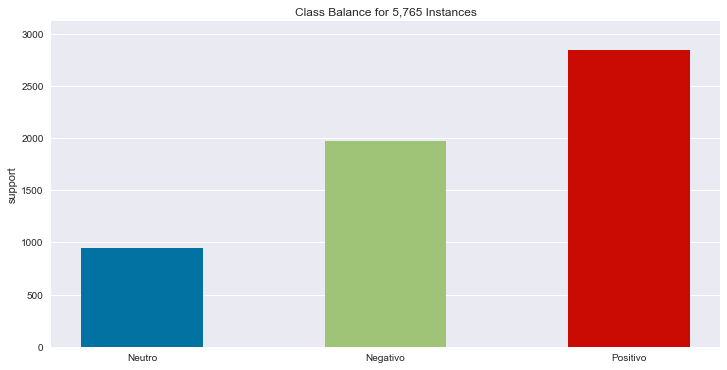

In [31]:
# Yellowbrick
# Instanciar
Grafico_Balanco = ClassBalance(labels=['Neutro', 'Negativo', 'Positivo'])
Grafico_Balanco.fit(Base_Dados['Classificacao'])
Grafico_Balanco.show();

In [32]:
# Plot - Avaliar
Anl_Valores = Base_Dados['Classificacao'].value_counts()

# Plotly
Grafico_Balanco_02 = go.Figure(
    go.Funnelarea(
        text=Anl_Valores.index,
        values=Anl_Valores.values,
        title={'text':'Distribuição dos Sentimentos', 'position':'top center'}
    ),
    layout = dict(width=800, height=500)
)

Grafico_Balanco_02.show();

### Quantidade de Palavras

In [33]:
# Função para calcular o tamanho
def Quantidade_Palavras(texto):
    quebrar = texto.split()
    
    return len(quebrar)

Base_Dados['Quantidade_Palavras'] = Base_Dados['Text'].apply(Quantidade_Palavras)

# Verificando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Data_Formatada,Ano,Mes,Dia,Quantidade_Palavras
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,2017-01-08,2017,1,8,10
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,2017-01-08,2017,1,8,7
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,2017-01-08,2017,1,8,7
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,2017-01-04,2017,1,4,2
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,2017-01-09,2017,1,9,20


In [34]:
# Análise
Base_Dados['Quantidade_Palavras'].describe()

count    5765.000000
mean       15.200694
std         3.870985
min         1.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        32.000000
Name: Quantidade_Palavras, dtype: float64

In [35]:
# Plot
px.box(Base_Dados, x='Classificacao', y='Quantidade_Palavras', color='Classificacao', title='Quantidade de Palavras por Sentimento', width=900, height=600)

### Nuvem de Palavras

In [36]:
# Criando uma wordcloud
# Variável
Concatenar = ''

# Loop no texto
for Loop in Base_Dados['Text']:

    # Loop para concatenar
    for Palavra in Loop.split():
        # Juntando as palavras
        Concatenar = Concatenar + ' ' + Palavra

print(f'Quantidade de Palavras agrupadas {len(Concatenar)}')

Quantidade de Palavras agrupadas 648853


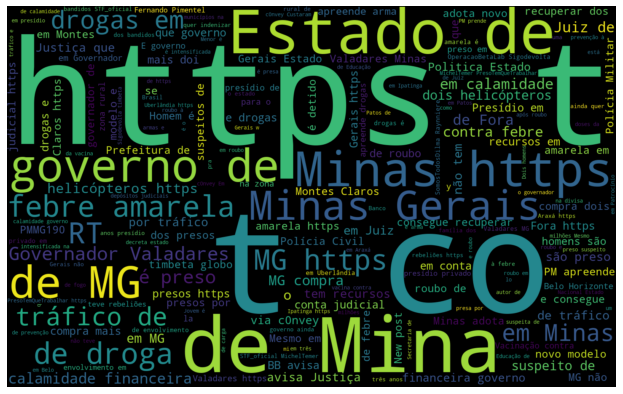

In [37]:
# Plot
# Instanciando as nuvem de palavras
Nuvem_Palavras = WordCloud(width=1600, height=1000).generate(Concatenar)

# Tamanho
Figura, Eixo = plt.subplots(figsize=(15,7))

# Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')

# Desativar os grids
Eixo.set_axis_off()

In [38]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [39]:
# Ajuste dos textos
Palavras_Positivas = ''
Palavras_Negativas = ''
Palavras_Neutras = ''

# Loop
for Sentimento in Base_Dados['Classificacao'].unique():

    # 1º Sentimento
    if Sentimento == 'Positivo':
        Filtro = Base_Dados.loc[Base_Dados['Classificacao']==Sentimento]

        # Loop para concatenar
        for Palavra in Filtro['Text']:
            for Quebra in Palavra.split():
                Palavras_Positivas = Palavras_Positivas + ' ' + Quebra
    
    # 2º Sentimento
    if Sentimento == 'Neutro':
        Filtro = Base_Dados.loc[Base_Dados['Classificacao']==Sentimento]

        # Loop para concatenar
        for Palavra in Filtro['Text']:
            for Quebra in Palavra.split():
                Palavras_Neutras = Palavras_Neutras + ' ' + Quebra
    
    # 3º Sentimento
    if Sentimento == 'Negativo':
        Filtro = Base_Dados.loc[Base_Dados['Classificacao']==Sentimento]

        # Loop para concatenar
        for Palavra in Filtro['Text']:
            for Quebra in Palavra.split():
                Palavras_Negativas = Palavras_Negativas + ' ' + Quebra


print('Quantidade de palavras:\n',
      f'Positivo: {len(Palavras_Positivas)}\n',
      f'Neutro: {len(Palavras_Neutras)}\n',
      f'Negativo: {len(Palavras_Negativas)}',
      )

Quantidade de palavras:
 Positivo: 314952
 Neutro: 221090
 Negativo: 112811


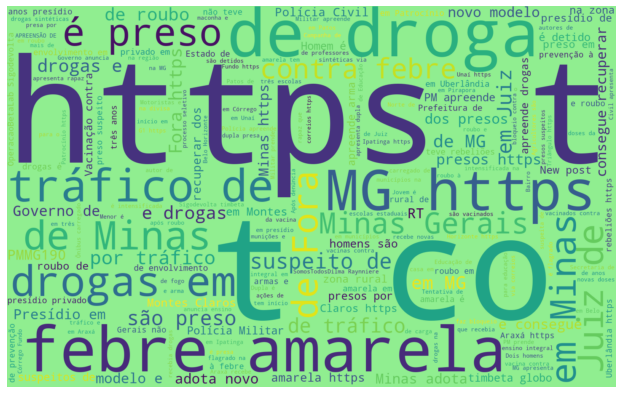

In [40]:
# Análise de sentimento - wordcloud Positivas

# Instanciando as nuvem de palavras
Nuvem_Palavras = WordCloud(width=1600, height=1000, background_color='lightgreen').generate(Palavras_Positivas)

# Tamanho
Figura, Eixo = plt.subplots(figsize=(15,7))

# Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')

# Desativar os grids
Eixo.set_axis_off()

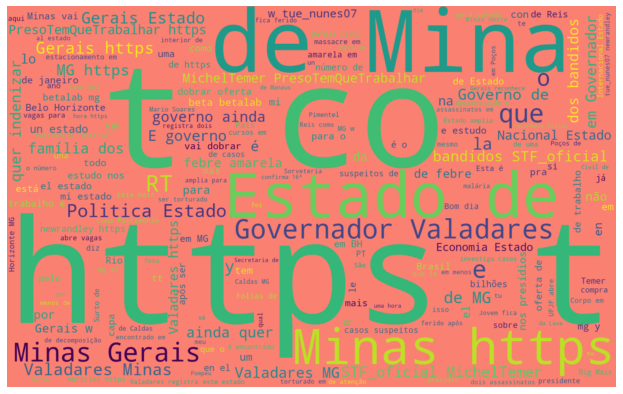

In [41]:
# Análise de sentimento - wordcloud Neutras

# Instanciando as nuvem de palavras
Nuvem_Palavras = WordCloud(width=1600, height=1000, background_color='salmon').generate(Palavras_Neutras)

# Tamanho
Figura, Eixo = plt.subplots(figsize=(15,7))

# Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')

# Desativar os grids
Eixo.set_axis_off()

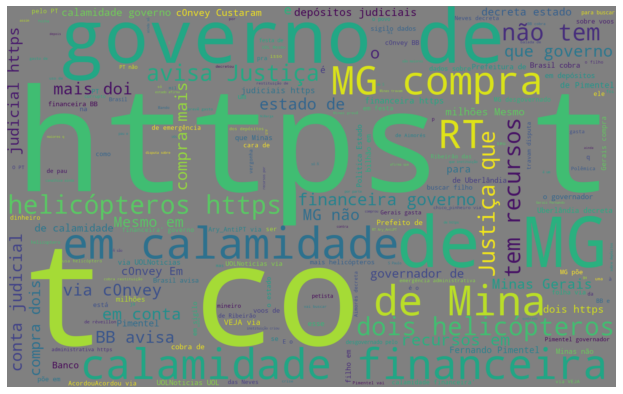

In [42]:
# Análise de sentimento - wordcloud Negativas

# Instanciando as nuvem de palavras
Nuvem_Palavras = WordCloud(width=1600, height=1000, background_color='gray').generate(Palavras_Negativas)

# Tamanho
Figura, Eixo = plt.subplots(figsize=(15,7))

# Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')

# Desativar os grids
Eixo.set_axis_off()

### Rank das palavras mais usadas

In [43]:
# Quebrar as frases
Quebra_Frases = Base_Dados['Text'].apply(lambda Texto: str(Texto).split())

# Rank das Palavras
Dados_Rank = Counter([item for sublist in Quebra_Frases for item in sublist])

# Tabela
Tab_Quantidade = pd.DataFrame(Dados_Rank.most_common(20))

# Ajustar as colunas
Tab_Quantidade.columns = ['Palavra', 'Qtd']

# Verificar
Tab_Quantidade

,Palavra,Qtd
0,de,6010
1,em,2880
2,Minas,1841
3,-,1661
4,e,1445
5,MG,1135
6,Estado,998
7,é,959
8,do,885
9,a,819


In [44]:
# Plot das Quantidades
Figura = px.bar(
    Tab_Quantidade,
    x='Qtd',
    y='Palavra',
    color='Palavra',
    orientation='h',
    width=900,
    height=600
)

Figura.show()

# Construção do Modelo

In [45]:
# Separando os dados
Dados_Modelo = Base_Dados[['Text', 'Classificacao']]

Dados_Modelo.shape

(5765, 2)

## Limpeza dos Dados

In [46]:
def Limpeza_Dados(texto):
    '''
    Função para limpar os dados
    '''
    # Retirar os links
    Camada_1 = re.sub('https:\S+', '', texto)

    # Converter para minúsculo
    Camada_2 = Camada_1.lower()

    # Retirar caracteres especiais
    Camada_3 = re.sub('["("")"?@|$|.|!,:;"]', '', Camada_2)

    # Retirar emojis
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)
    
    Camada_4 = re.sub(emoj, '', Camada_3)

    # Retirar hashtags
    Camada_5 = re.sub('#\S+', '', Camada_4)

    # Retirar valores numéricos
    Camada_6 = re.sub('[0-9]', '', Camada_5)

    return Camada_5

In [47]:
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply(Limpeza_Dados)

Dados_Modelo.head()

,Text,Classificacao
0,catedral de santo antônio - governador valad...,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento de vereadores e p...,Negativo


## StopWords

In [48]:
# Pool de Palavras
nltk.download('stopwords')
Grupo_Palavras = nltk.corpus.stopwords.words('portuguese')

len(Grupo_Palavras)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


207

In [49]:
def Remover_StopWords(texto):
    '''
    Remover as palavras 'vazias'
    '''
    # Quebrar as frases
    Lista_Palavras = texto.split()

    # Nova frase
    Frase_Ajustada = ''

    # Loop
    for Loop in Lista_Palavras:

        # Validar se é StopWords
        if Loop not in Grupo_Palavras:
            Frase_Ajustada = Frase_Ajustada + ' ' + Loop
    
    return Frase_Ajustada

In [50]:
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply(Remover_StopWords)

Dados_Modelo.head()

,Text,Classificacao
0,catedral santo antônio - governador valadares/mg,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento vereadores prefei...,Negativo


## Extração do Radical

In [51]:
# Definir a função do Radical
nltk.download('rslp')
Radical = nltk.stem.RSLPStemmer()

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [52]:
def Extrair_Radical(texto):
    '''
    Extrair o radical da palavra
    '''
    # Quebra
    Lista_Palavras = texto.split()

    # Nova Frase
    Frase_Ajustada = ''

    # Loop
    for Loop in Lista_Palavras:
        # Aplicando o radical
        Extracao = Radical.stem(Loop)
        Frase_Ajustada = Frase_Ajustada + ' ' + Extracao
    
    return Frase_Ajustada

In [53]:
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply(Extrair_Radical)

Dados_Modelo.head()

,Text,Classificacao
0,catedr sant antôni - govern valadares/mg,Neutro
1,govern valad min geral,Neutro
2,govern valad min geral,Neutro
3,,Neutro
4,psol vai quest aument vere prefeit bh justiç ...,Negativo


## Tokenização

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Modelo

In [55]:
# Separando os dados
Frases = Dados_Modelo['Text']
Classes = Dados_Modelo['Classificacao']

# Dividindo
x_train, x_test, y_train, y_test = train_test_split(Frases, Classes, test_size=0.2, random_state=10)

print(f'Quantidade de dados de treino: {x_train.shape[0]}')
print(f'Quantidade de dados de teste: {x_test.shape[0]}')

Quantidade de dados de treino: 4612
Quantidade de dados de teste: 1153


In [56]:
# Instanciando o método
Token = TweetTokenizer()
Vetorizacao = CountVectorizer(analyzer='word', tokenizer=Token.tokenize)

In [57]:
# Aplicando a transformação
Frequencia_Palavras = Vetorizacao.fit_transform(x_train)

In [58]:
# Instanciando o modelo
ModeloNB = MultinomialNB()

#Treinamento
ModeloNB.fit(Frequencia_Palavras, y_train)

MultinomialNB()

## Avaliação do Modelo

In [59]:
# Transformação no x_test
Vetor_x_test = Vetorizacao.transform(x_test)

# Realizando as Previsoes
Previsoes = ModeloNB.predict(Vetor_x_test)

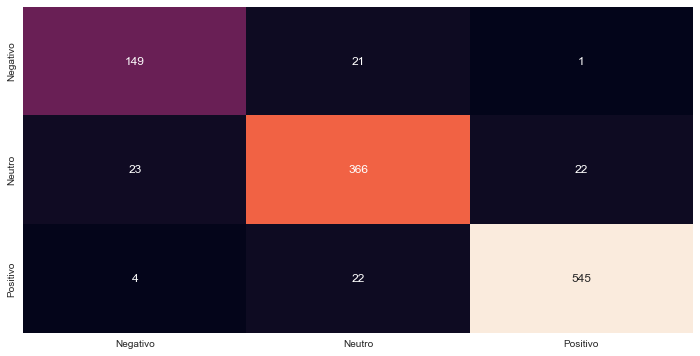

In [60]:
# Matriz de confusão
# Definindo as classes
Classes = ['Negativo', 'Neutro', 'Positivo']

# Plot
Matriz_Confusao = confusion_matrix(y_test, Previsoes)

sns.heatmap(Matriz_Confusao, annot=True, cbar=False, fmt='d', yticklabels=Classes, xticklabels=Classes);

In [61]:
# Relatório de classificação
# Avaliação
Avaliacao = classification_report(y_test, Previsoes)
print(Avaliacao)

              precision    recall  f1-score   support

    Negativo       0.85      0.87      0.86       171
      Neutro       0.89      0.89      0.89       411
    Positivo       0.96      0.95      0.96       571

    accuracy                           0.92      1153
   macro avg       0.90      0.91      0.90      1153
weighted avg       0.92      0.92      0.92      1153



# Teste do Modelo

In [62]:
def Consolidar_Funcoes(texto):
    # 1ª etapa - Limpeza da frase
    Limpeza = Limpeza_Dados(texto)

    # 2ª etapa - Removendo StopWords
    StopWord = Remover_StopWords(Limpeza)

    # 3ª etapa - Extraindo os Radicais
    Rad = Extrair_Radical(StopWord)

    # 4ª etapa - Vetorização
    Vet = Vetorizacao.transform([Rad])

    # 5ª etapa - Prevendo com base no modelo treinado
    Previsao = ModeloNB.predict(Vet)

    return Previsao

In [63]:
Frase_Exemplo = 'O estado de minas gerais está em calamidade pública'

print(f'O sentimento da frase "{Frase_Exemplo}" é: {Consolidar_Funcoes(Frase_Exemplo)[0]}')

O sentimento da frase "O estado de minas gerais está em calamidade pública" é: Negativo


# Verificando outros algoritmos

In [64]:
# Outros modelos
# Algoritmos para experimentação
Algoritmos = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators=300, max_depth=12),
    MultinomialNB(),
    SVC()
]

# Nomes
Lista_Nome = ['Regressão Logística', 'Floresta Aleatória', 'Naive Bayes', 'Vetor de Máquinas']

In [65]:
# Lista das acurácias
Resultado_Acuracia = []

# Loop
for Nome, Modelo in zip(Lista_Nome, Algoritmos):

    # Atribuindo
    Alg = Modelo

    # Realizando o fit dos dados
    Alg.fit(Frequencia_Palavras, y_train)

    # Testando
    Vetor_Teste = Vetorizacao.transform(x_test)

    # Realizando as previsões
    Previsoes_Teste = Alg.predict(Vetor_Teste)

    # Resultados
    Resultado = accuracy_score(y_test, Previsoes_Teste)

    # Salvando os resultados
    Resultado_Acuracia.append(Resultado)

In [66]:
# Organizando
Dicionario = {
    'Nome': Lista_Nome,
    'Resultado': Resultado_Acuracia
}

pd.DataFrame(Dicionario).sort_values('Resultado', ascending=False)

,Nome,Resultado
3,Vetor de Máquinas,0.947962
0,Regressão Logística,0.946227
2,Naive Bayes,0.919341
1,Floresta Aleatória,0.893322


In [ ]:
# crie um texto para readme.md que explica sobre o projeto de data mining e classificação de emoções (positivo, negativo e neutro) de tweets de pessoas